<a href="https://colab.research.google.com/github/brianellis1997/Music_Generation/blob/main/Popularity_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/brianellis1997/Music_Generation.git

Cloning into 'Music_Generation'...
remote: Enumerating objects: 153, done.
remote: Counting objects: 100% (153/153), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 153 (delta 73), reused 36 (delta 7), pack-reused 0
Receiving objects: 100% (153/153), 1.41 MiB | 9.32 MiB/s, done.
Resolving deltas: 100% (73/73), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS340/spotify_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [ ]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


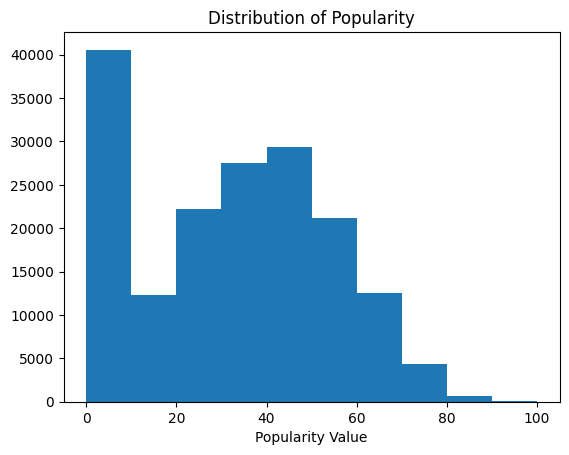

In [ ]:
plt.hist(df['popularity'])
plt.title('Distribution of Popularity')
plt.xlabel('Popularity Value')
plt.show()

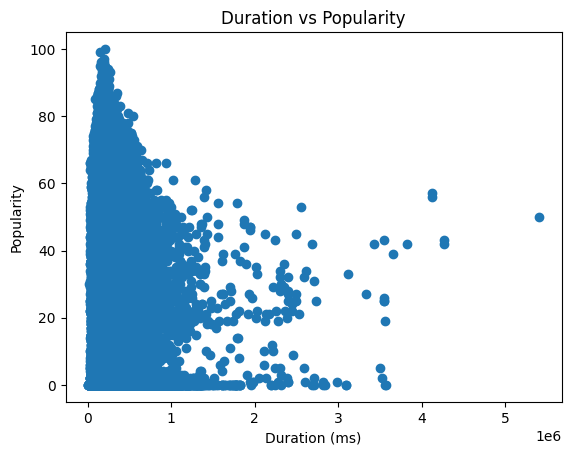

In [ ]:
plt.scatter(x=df['duration_ms'], y=df['popularity'])
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.title('Duration vs Popularity')
plt.show()

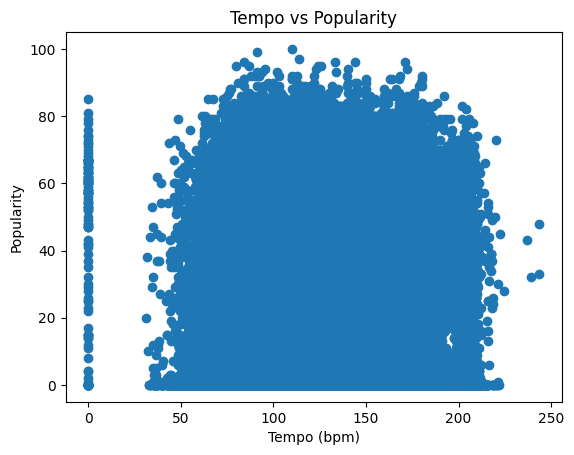

In [ ]:
plt.scatter(x=df['tempo'], y=df['popularity'])
plt.xlabel('Tempo (bpm)')
plt.ylabel('Popularity')
plt.title('Tempo vs Popularity')
plt.show()

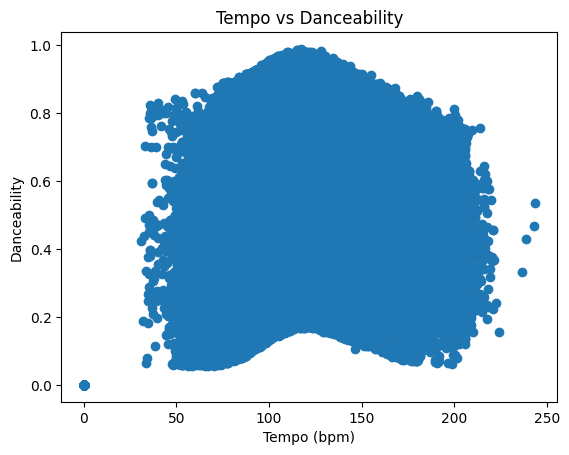

In [ ]:
plt.scatter(x=df['tempo'], y=df['danceability'])
plt.xlabel('Tempo (bpm)')
plt.ylabel('Danceability')
plt.title('Tempo vs Danceability')
plt.show()

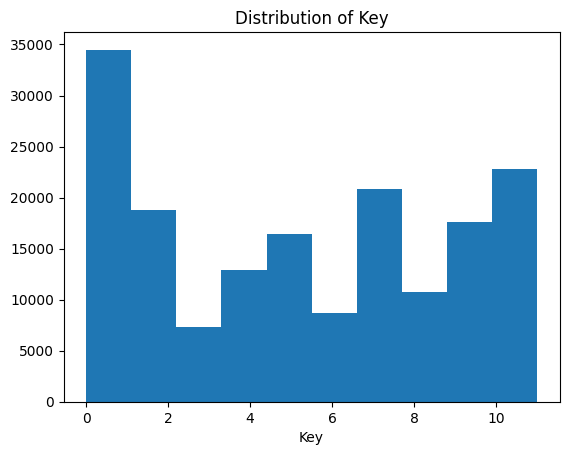

In [ ]:
plt.hist(df['key'])
plt.title('Distribution of Key')
plt.xlabel('Key')
plt.show()

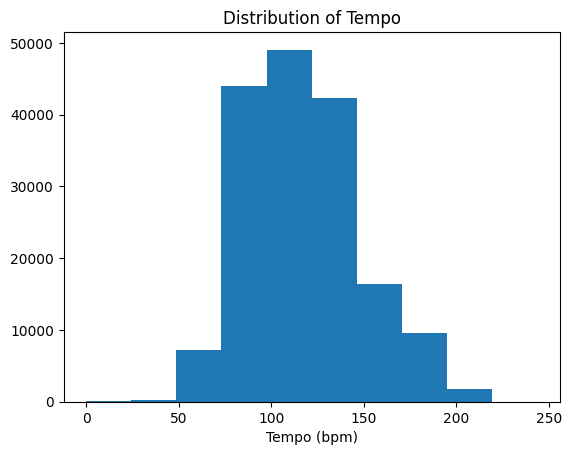

In [ ]:
plt.hist(df['tempo'])
plt.title('Distribution of Tempo')
plt.xlabel('Tempo (bpm)')
plt.show()

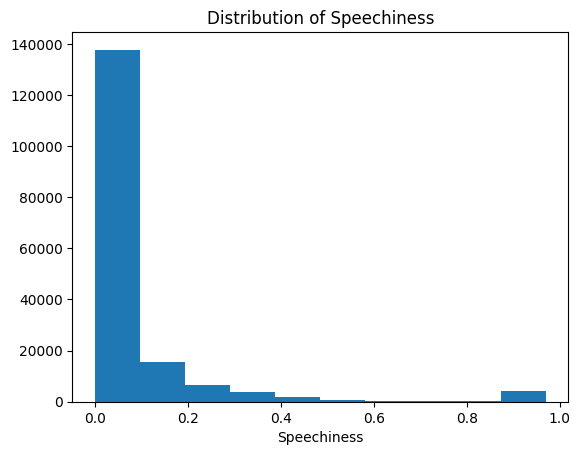

In [ ]:
plt.hist(df['speechiness'])
plt.title('Distribution of Speechiness')
plt.xlabel('Speechiness')
plt.show()

In [ ]:
df['mode'].value_counts()

1    120635
0     50018
Name: mode, dtype: int64

# MIDI Feature Extractor

In [ ]:
from music21 import *

# Load MIDI file
midi_file_path = '/content/drive/MyDrive/DS340/Johann Sebastian Bach/Invention 1, BWV 772.mid'
midi_stream = converter.parse(midi_file_path)

In [ ]:
for event in midi_stream.flat:
  print(event)

RH: 
LH: 
<music21.clef.TrebleClef>
<music21.clef.BassClef>
<music21.tempo.MetronomeMark andantino Quarter=80>
<music21.tempo.MetronomeMark andantino Quarter=80>
G# major
G# major
<music21.meter.TimeSignature 4/4>
<music21.meter.TimeSignature 4/4>
<music21.note.Rest 16th>
<music21.note.Rest 2.25ql>
<music21.note.Note C>
<music21.note.Note D>
<music21.note.Note E>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note D>
<music21.note.Note E>
<music21.note.Note B>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note D>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note A>
<music21.note.Note G>
<music21.note.Note B>
<music21.note.Note C>
<music21.note.Rest 1.25ql>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note G>
<music21.note.Note D>
<music21.note.Note G>
<music21.note

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  exec(code_obj, self.user_global_ns, self.user_ns)


## Key Signiature

In [ ]:
def key_signature_extract(midi_stream):
  # Extract key signature
  key_signature = None
  for event in midi_stream.flat.getElementsByClass('KeySignature'):
      key_signature = event
      break

  if key_signature:
      return key_signature
  else:
      print("Key signature not found in the MIDI file.")

In [ ]:
bach_key = key_signature_extract(midi_stream)
bach_key

/usr/local/lib/python3.10/dist-packages/music21/stream/base.py:3694: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


<music21.key.Key of G# major>

## Tempo

In [ ]:
# We can see there are multiple tempos throughout a piece
for event in midi_stream.flat:
    if 'MetronomeMark' in event.classes:
      print(event)

<music21.tempo.MetronomeMark Quarter=100>
<music21.tempo.MetronomeMark Quarter=100>


In [ ]:
def tempo_extract(midi_stream):
  # Extract tempo
  tempos = []
  tempo_value = 0
  for event in midi_stream.flatten():
      if 'MetronomeMark' in event.classes:
          tempos.append(int(event.number))

  if tempos is not None:
    num_tempos = len(tempos)
    for tempo in tempos:
      tempo_value += tempo
    return tempo_value/num_tempos

  else:
      print("Tempo information not found in the MIDI file.")

In [ ]:
bach_tempo = tempo_extract(midi_stream)
bach_tempo

80.0

## Duration (min)

In [ ]:
def duration_extract(midi_stream):
  # Get total duration of the piece
  quarter_lengths = midi_stream.duration.quarterLength
  tempo_value = tempo_extract(midi_stream)

  duration_min = quarter_lengths/tempo_value
  return duration_min

In [ ]:
bach_duration = duration_extract(midi_stream)
bach_duration

1.1

### Another Example

In [ ]:
# Load MIDI file
midi_file_path = '/content/drive/MyDrive/DS340/Johann Sebastian Bach/Invention 15.mid'
midi_stream = converter.parse(midi_file_path)

# Extract key signature
bach_key2 = key_signature_extract(midi_stream)
bach_tempo2 = tempo_extract(midi_stream)
bach_duration2 = duration_extract(midi_stream)

bach_key2, bach_tempo2, bach_duration2

(<music21.key.Key of g# minor>, 105.0, 0.8380952380952381)

In [ ]:
# installs and imports to convert MIDI into audio
!pip install pretty_midi
!wget https://www.dropbox.com/s/4x27l49kxcwamp5/GeneralUser_GS_1.471.zip
!unzip GeneralUser_GS_1.471.zip
!apt install -y fluidsynth
from pretty_midi import PrettyMIDI
from IPython.display import Audio
from scipy.io.wavfile import write
import librosa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 29.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.0 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592289 sha256=98f57373a6ec69470b700bfd763f94fa3a4cd4808a04c2695f849872e0445782
  Stored in directory: /root/.cache/pip/wheels/cd/a5/30/7b8b7f58709f5150f67f98fde4b891ebf0be9ef07a8af49f25
Successfully built pretty_midi
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0
--2024-03-18 00:07:31--  https://www.dropbox.com/s/4x27l49kxcwamp5/GeneralUser_GS_1.471.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.18|:443... connect

In [ ]:
# render the example
!fluidsynth -ni GeneralUser\ GS\ 1.471/GeneralUser\ GS\ v1.471.sf2 "/content/drive/MyDrive/DS340/Johann Sebastian Bach/Invention 15.mid" -F example.wav -r 44100

# hear the example
x,sr=librosa.load('example.wav')
Audio(x,rate=sr)

FluidSynth runtime version 2.2.5
Copyright (C) 2000-2022 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.

Rendering audio to file 'example.wav'..


## Valence

In [ ]:
# Load MIDI file
midi_file_path = '/content/drive/MyDrive/DS340/Johann Sebastian Bach/Air in D Major.mid'
midi_stream = converter.parse(midi_file_path)

# Extract key signature
bach_key2 = key_signature_extract(midi_stream)
bach_tempo2 = tempo_extract(midi_stream)
bach_duration2 = duration_extract(midi_stream)

bach_key2, bach_tempo2, bach_duration2

(<music21.key.Key of D major>, 80.0, 3.6)

In [ ]:
for event in midi_stream.flatten():
  print(event)

RH: 
LH: 
<music21.clef.TrebleClef>
<music21.clef.BassClef>
<music21.tempo.MetronomeMark andantino Quarter=80>
<music21.tempo.MetronomeMark andantino Quarter=80>
D major
D major
<music21.meter.TimeSignature 4/4>
<music21.meter.TimeSignature 4/4>
<music21.chord.Chord D5 F#5>
<music21.note.Note D>
<music21.note.Note D>
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Rest whole>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note A>
<music21.note.Note A>
<music21.note.Rest quarter>
<music21.note.Rest 1.75ql>
<music21.note.Note G>
<music21.note.Note B>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note F#>
<music21.note.Rest 1/6ql>
<music21.chord.Chord B4 E5>
<music21.note.Rest half>
<music21.note.Note G#>
<music21.note.Note D>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note D>
<music21.chord.Chord A4 C#5>
<music21.note.Note A>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note G>
<music21.note.Note A>
<music21.note.Note G>
<m

In [ ]:
# Understand how many major and minor chords in piece

# Extract chords from the MIDI file
chords = midi_stream.chordify()

# Initialize counters for major and minor chords
major_chords_count = 0
minor_chords_count = 0

# Iterate through chords and count major and minor chords
for chord in chords.recurse().getElementsByClass('Chord'):
    if chord.isMajorTriad():
        major_chords_count += 1
    elif chord.isMinorTriad():
        minor_chords_count += 1

# Print the counts
print("Major chords count:", major_chords_count)
print("Minor chords count:", minor_chords_count)

Major chords count: 16
Minor chords count: 5


In [ ]:
def valence_extract(midi_stream):
  # key_val = 0
  major_chords_count = 0
  minor_chords_count = 0

  # key = key_signature_extract(midi_stream)
  # if str(key).contains('major'):
  #   key_val = 1

  for chord in chords.recurse().getElementsByClass('Chord'):
    if chord.isMajorTriad():
        major_chords_count += 1
    elif chord.isMinorTriad():
        minor_chords_count += 1

  # Catch division by zero
  if major_chords_count > 0:
    if minor_chords_count == 0:
      valence = 1
      return valence
    else:
      valence = major_chords_count/(major_chords_count+minor_chords_count)
    return valence
  return 0

In [ ]:
bach_valence = valence_extract(midi_stream)
bach_valence

0.7619047619047619

# EDA

In [ ]:
df.describe(include='all')

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653,170653.000000,1.706530e+05,170653.000000,170653.000000,170653,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653,170653.000000,170653,170653.000000,170653.000000
unique,NaN,NaN,NaN,34088,NaN,NaN,NaN,NaN,170653,NaN,NaN,NaN,NaN,NaN,133638,NaN,11244,NaN,NaN
top,NaN,NaN,NaN,['Эрнест Хемингуэй'],NaN,NaN,NaN,NaN,4BJqT0PrAfrxzMOxytFOIz,NaN,NaN,NaN,NaN,NaN,White Christmas,NaN,1945,NaN,NaN
freq,NaN,NaN,NaN,1211,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,73,NaN,1446,NaN,NaN
mean,0.528587,1976.787241,0.502115,NaN,0.537396,2.309483e+05,0.482389,0.084575,NaN,0.167010,5.199844,0.205839,-11.467990,0.706902,NaN,31.431794,NaN,0.098393,116.861590
std,0.263171,25.917853,0.376032,NaN,0.176138,1.261184e+05,0.267646,0.278249,NaN,0.313475,3.515094,0.174805,5.697943,0.455184,NaN,21.826615,NaN,0.162740,30.708533
min,0.000000,1921.000000,0.000000,NaN,0.000000,5.108000e+03,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,-60.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,NaN,0.415000,1.698270e+05,0.255000,0.000000,NaN,0.000000,2.000000,0.098800,-14.615000,0.000000,NaN,11.000000,NaN,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,NaN,0.548000,2.074670e+05,0.471000,0.000000,NaN,0.000216,5.000000,0.136000,-10.580000,1.000000,NaN,33.000000,NaN,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,NaN,0.668000,2.624000e+05,0.703000,0.000000,NaN,0.102000,8.000000,0.261000,-7.183000,1.000000,NaN,48.000000,NaN,0.075600,135.537000


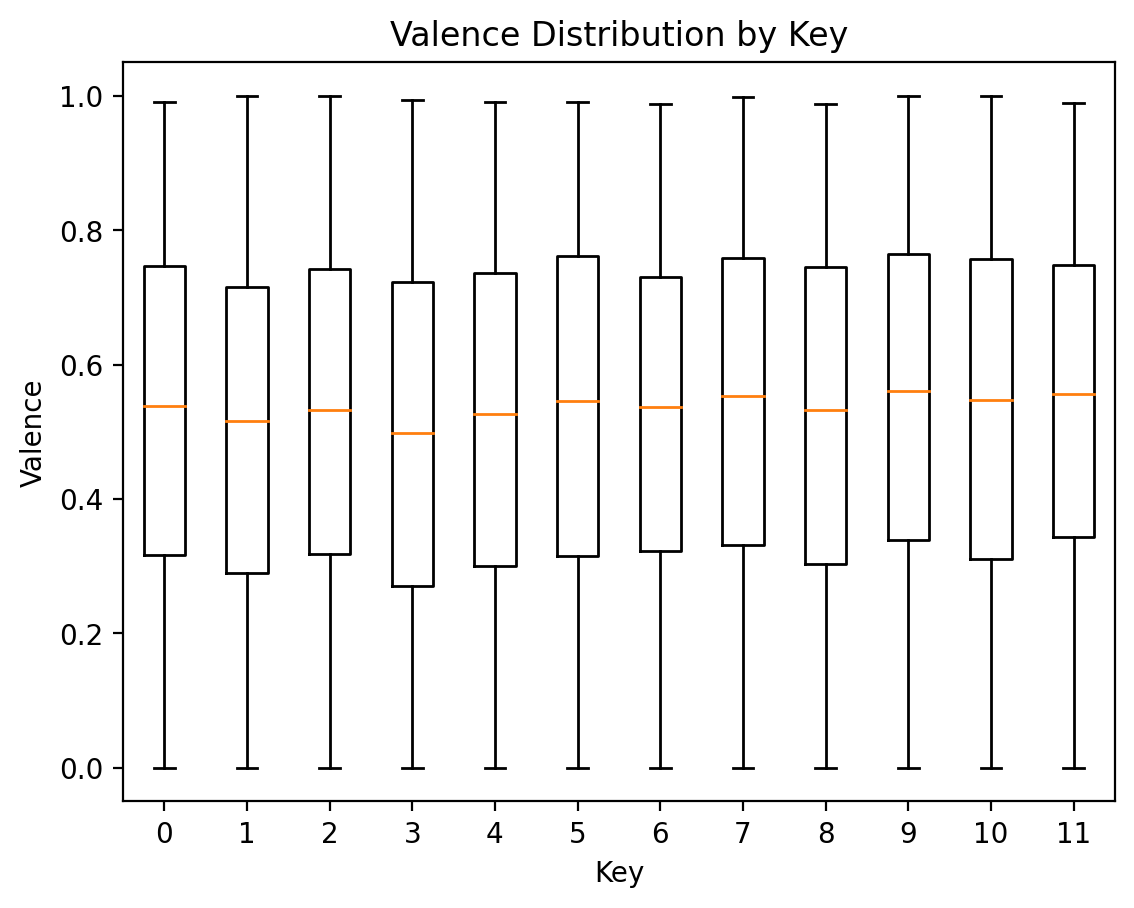

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df with columns 'key' and 'valence'

# Create a list of valence values for each key category
valence_by_key = [df[df['key'] == key]['valence'] for key in range(12)]

# Create a box plot
plt.boxplot(valence_by_key)
plt.xlabel('Key')
plt.ylabel('Valence')
plt.title('Valence Distribution by Key')
plt.xticks(range(1, 13), range(12))  # Assuming 'key' ranges from 0 to 11
plt.show()


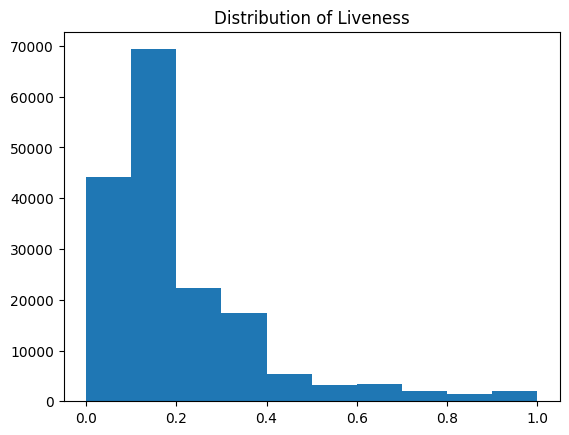

In [ ]:
# Liveness
plt.hist(df['liveness'])
plt.title('Distribution of Liveness')
plt.show()

# Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [ ]:
df2 = df.drop(columns=['year', 'acousticness', 'artists', 'popularity', 'energy', 'explicit', 'id', 'instrumentalness', 'liveness', 'name', 'mode', 'release_date', 'speechiness'])

X = df2.drop('danceability', axis=1)
y = df['danceability']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((136522, 5), (34131, 5))

In [ ]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_pred, y_test)

print(np.sqrt(mse))

0.14297840157216396


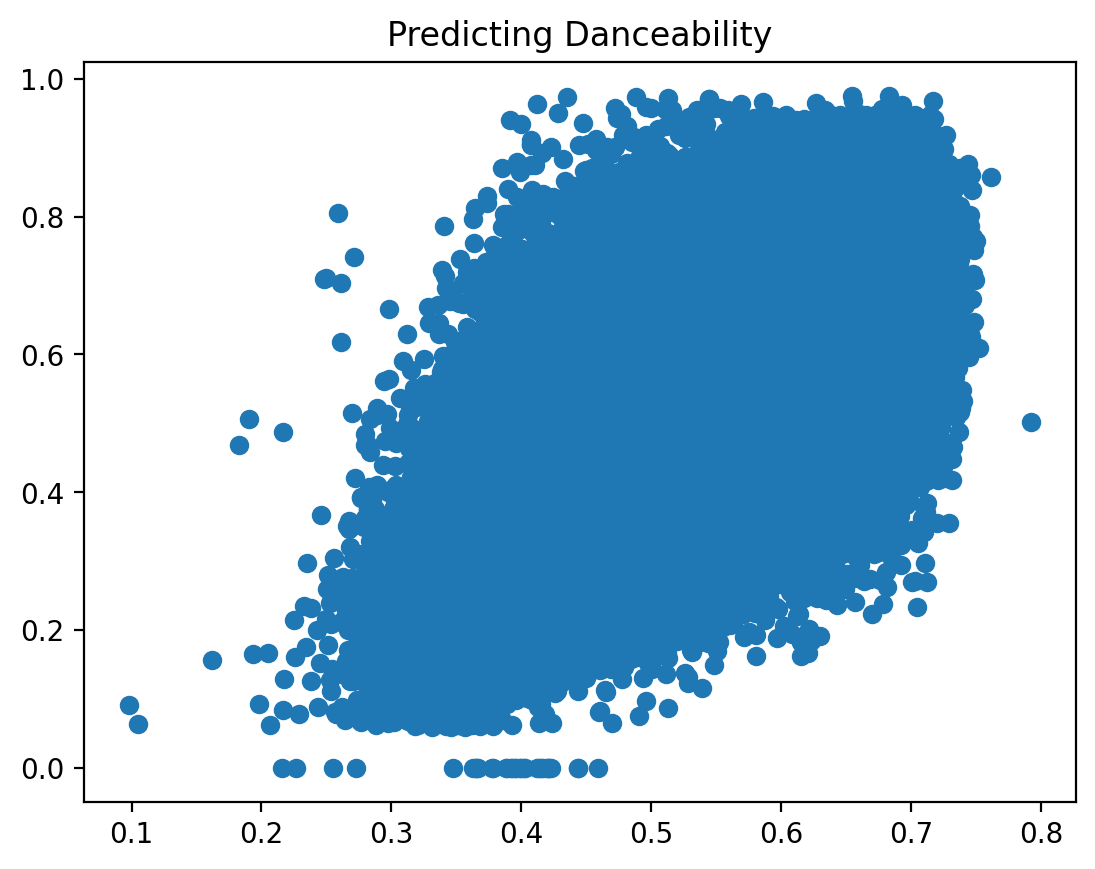

In [ ]:
plt.scatter(y_pred, y_test)
plt.title('Predicting Danceability')
plt.show()

In [ ]:
df2 = df.drop(columns=['year', 'acousticness', 'artists', 'popularity', 'danceability', 'explicit', 'id', 'instrumentalness', 'liveness', 'name', 'mode', 'release_date', 'speechiness'])

X = df2.drop('energy', axis=1)
y = df['energy']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((136522, 5), (34131, 5))

In [ ]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_pred, y_test)

print(np.sqrt(mse))

0.1612730609001531


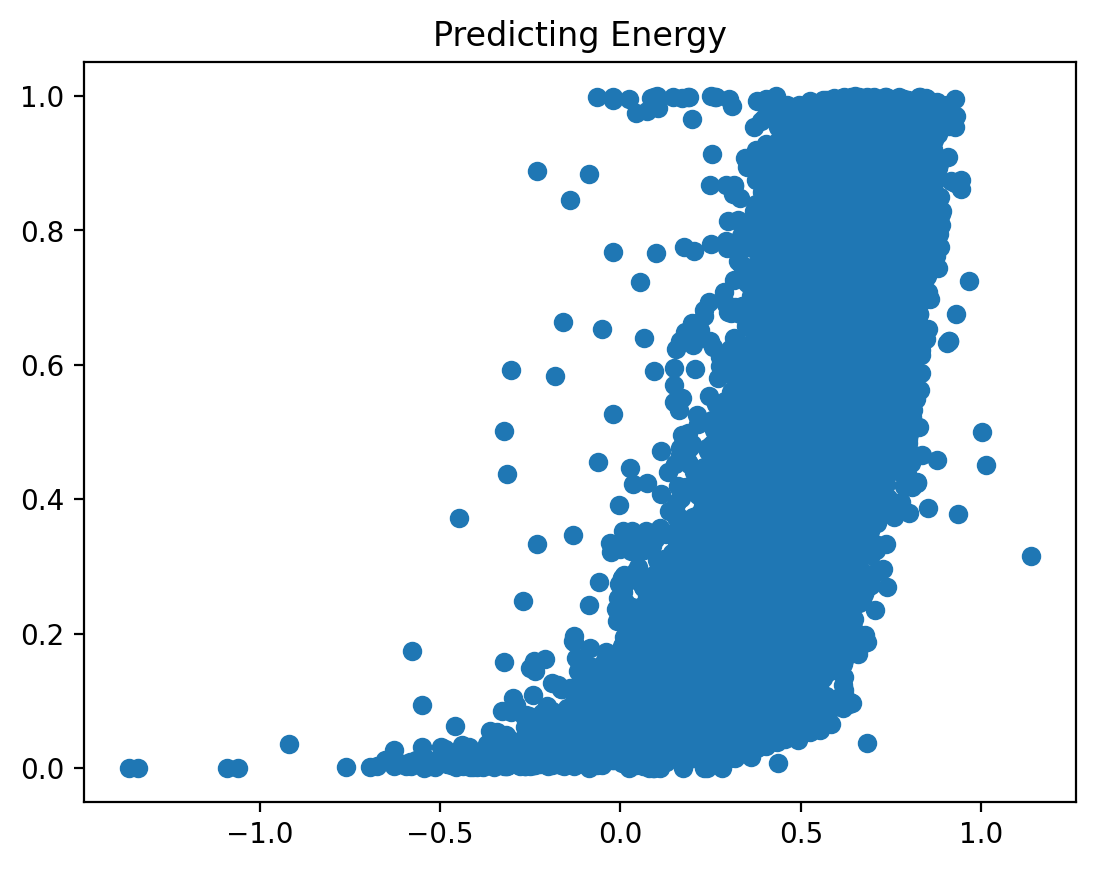

In [ ]:
plt.scatter(y_pred, y_test)
plt.title('Predicting Energy')
plt.show()

A polynomial model might work better here.

Root Mean Squared Error: 0.14664460408301241


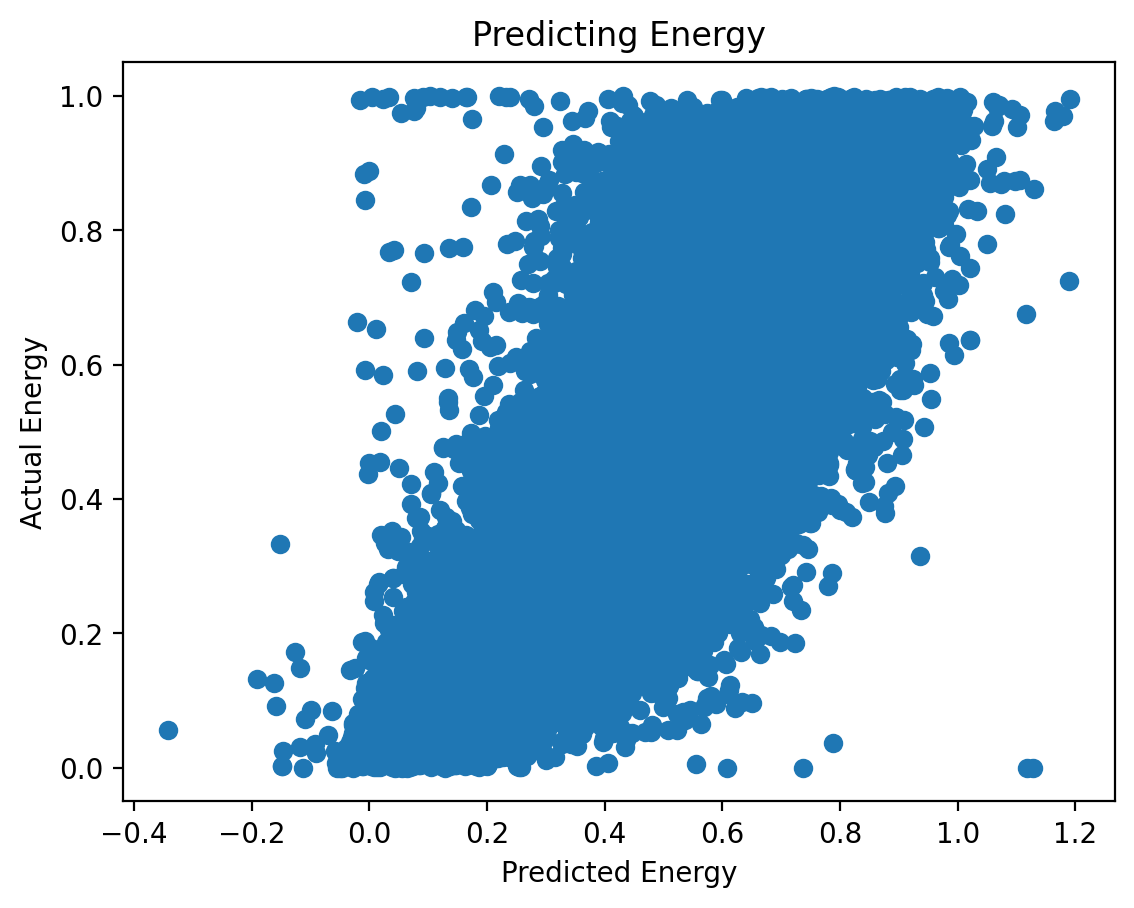

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt

# # Drop unnecessary columns
# df2 = df.drop(columns=['year', 'acousticness', 'artists', 'popularity', 'danceability', 'explicit', 'id', 'instrumentalness', 'liveness', 'name', 'mode', 'release_date', 'speechiness'])

# # Split data into features (X) and target variable (y)
# X = df2.drop('energy', axis=1)
# y = df['energy']

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize StandardScaler
# sc = StandardScaler()

# # Fit and transform training data, transform testing data
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# Transform features into polynomial features of degree 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize LinearRegression model
lr = LinearRegression()

# Fit the polynomial features to the model
lr.fit(X_train_poly, y_train)

# Predict on the testing set
y_pred = lr.predict(X_test_poly)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print root mean squared error
print("Root Mean Squared Error:", np.sqrt(mse))

# Plot predicted vs. actual energy values
plt.scatter(y_pred, y_test)
plt.title('Predicting Energy')
plt.xlabel('Predicted Energy')
plt.ylabel('Actual Energy')
plt.show()

Root Mean Squared Error: 0.14435144660062713


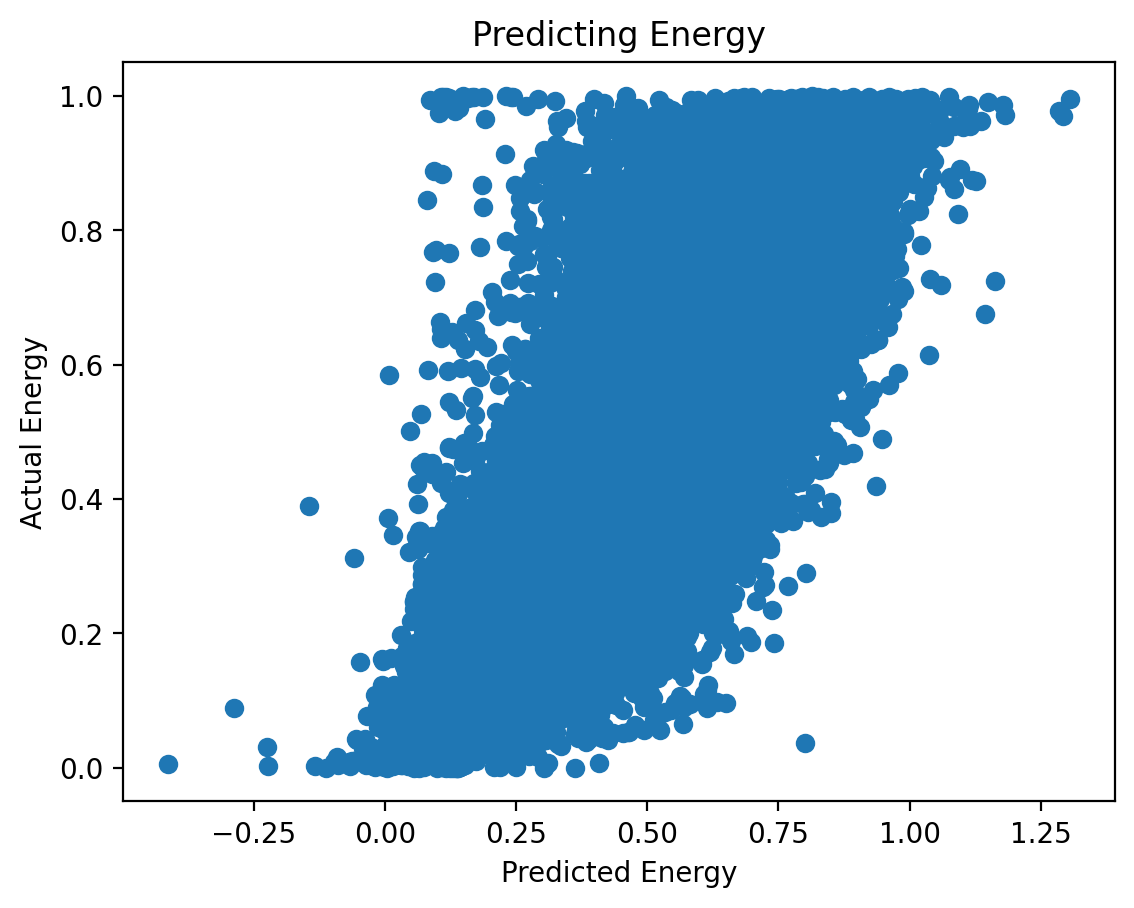

In [ ]:
# Transform features into polynomial features of degree 3
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize LinearRegression model
lr = LinearRegression()

# Fit the polynomial features to the model
lr.fit(X_train_poly, y_train)

# Predict on the testing set
y_pred = lr.predict(X_test_poly)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print root mean squared error
print("Root Mean Squared Error:", np.sqrt(mse))

# Plot predicted vs. actual energy values
plt.scatter(y_pred, y_test)
plt.title('Predicting Energy')
plt.xlabel('Predicted Energy')
plt.ylabel('Actual Energy')
plt.show()

We see that a polynomial value of 2 fits energy the best.

### Liveness

Root Mean Squared Error: 0.17365241278845026


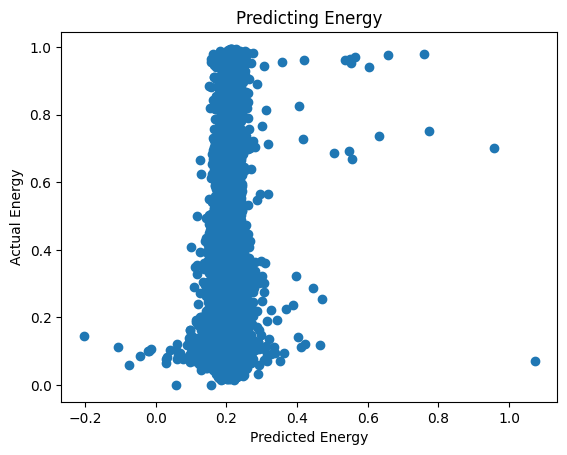

Root Mean Squared Error: 0.23827886596882528


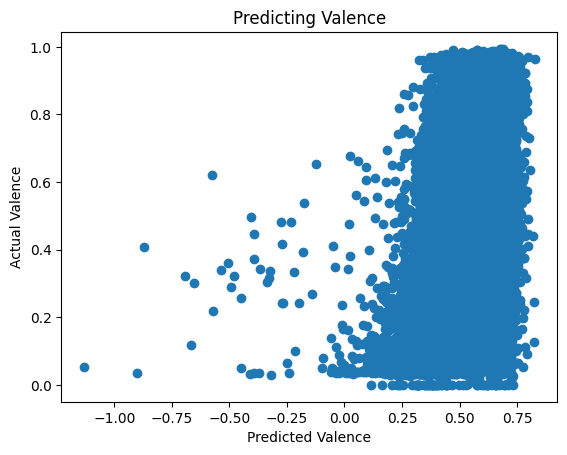

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt

# Drop unnecessary columns
df2 = df.drop(columns=['year', 'acousticness', 'artists', 'popularity', 'danceability', 'explicit', 'id', 'instrumentalness', 'liveness', 'name', 'mode', 'release_date', 'speechiness'])

# Split data into features (X) and target variable (y)
X = df2.drop('valence', axis=1)
y = df['valence']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
sc = StandardScaler()

# Fit and transform training data, transform testing data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialize LinearRegression model
lr = LinearRegression()

# Fit the polynomial features to the model
lr.fit(X_train, y_train)

# Predict on the testing set
y_pred = lr.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print root mean squared error
print("Root Mean Squared Error:", np.sqrt(mse))

# Plot predicted vs. actual energy values
plt.scatter(y_pred, y_test)
plt.title('Predicting Valence')
plt.xlabel('Predicted Valence')
plt.ylabel('Actual Valence')
plt.show()

After doing this preliminary modeling among the features we can't engineer, it seems like `danceability` and `energy` are good candidates for imputation through additional models. `Valence` can be calculated simply by using the major/minor key of the piece along with the overall prevelance of major vs minor chords (ex. 50 bars of major chords vs 10 bars of minor chords would score high in valence)<br>Other non-feature engineerable variables such as `liveness` we will have to drop which is fine as it doesn't contain much variance in its distribution.